# HEART DISEASE ANALYSIS

Heart disease remains a leading cause of mortality worldwide, and early detection is crucial for effective intervention and prevention. Despite advancements in medical research, there is a pressing need for a comprehensive analysis that integrates machine learning techniques to accurately predict and identify individuals at risk of developing heart disease

# Features

age: (Age of the patient in years)
sex: (Male/Female)
cp: chest pain type (typical angina, atypical angina, non-anginal, asymptomatic )
trestbps: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol: (serum cholesterol in mg/dl)
fbs: (if fasting blood sugar > 120 mg/dl)
restecg: (resting electrocardiographic results)-- Values: (normal, stt abnormality, lv hypertrophy)
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: normal; fixed defect; reversible defect
num: the predicted attribute

## Collect Data : Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## Import Dataset

In [2]:
heart_data = pd.read_csv('heart_disease.csv')

In [3]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
print('No.of patients',len(heart_data.index))

No.of patients 1025


In [10]:
print('No.of attributes',len(heart_data.columns))

No.of attributes 14


# Analyzing the Data

Creating different plot to check relationship between variables

<function matplotlib.pyplot.show(close=None, block=None)>

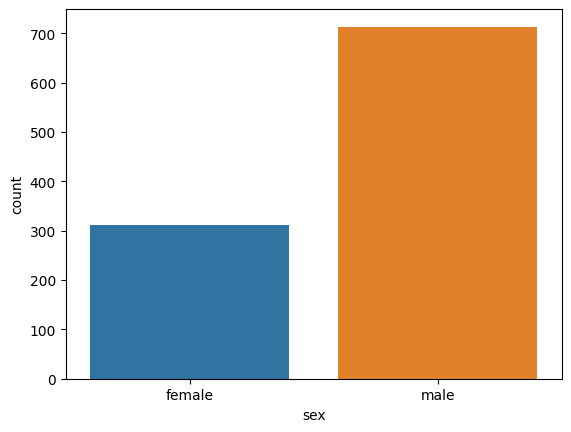

In [11]:
sns.countplot(data=heart_data, x = 'sex')
plt.xticks([0,1],['female','male'])
plt.show

In [12]:
heart_data['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [13]:
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<function matplotlib.pyplot.show(close=None, block=None)>

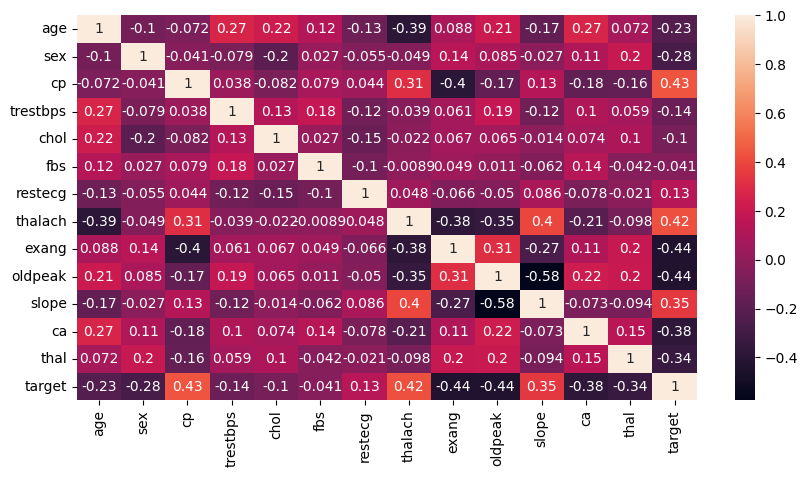

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(data=heart_data.corr(), annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

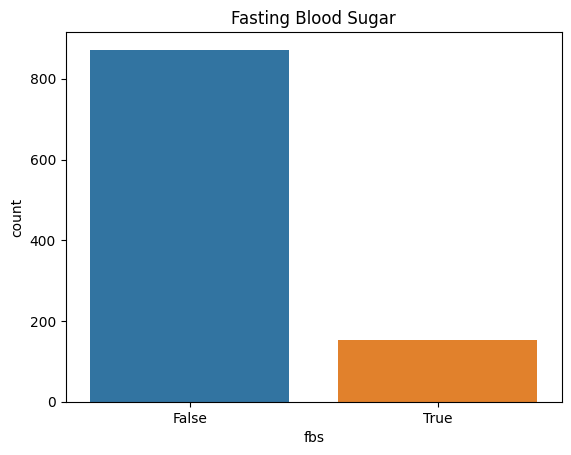

In [16]:
sns.countplot(data=heart_data, x = 'fbs')
plt.title('Fasting Blood Sugar')
plt.xticks([0,1],['False','True'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

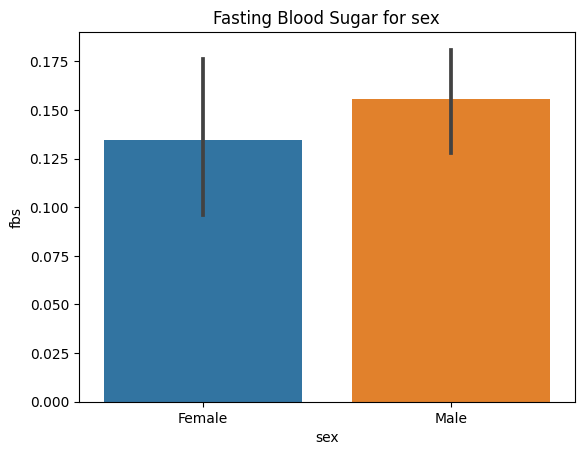

In [17]:
sns.barplot(x='sex', y='fbs', data=heart_data)
plt.title('Fasting Blood Sugar for sex')
plt.xticks([0,1],['Female','Male'])
plt.show

<Axes: xlabel='restecg'>

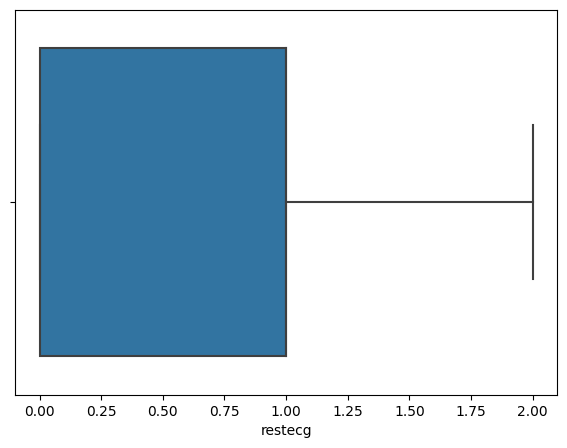

In [18]:
plt.figure(figsize=(7,5))
sns.boxplot(data=heart_data, x='restecg')

In [19]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Resting Blood Pressure Distribution')

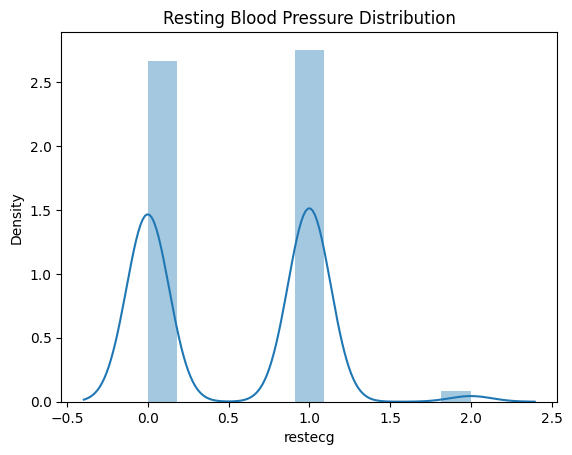

In [20]:
sns.distplot(heart_data['restecg'])
plt.title('Resting Blood Pressure Distribution')

Text(0.5, 1.0, 'Serum Cholestrol Distribution')

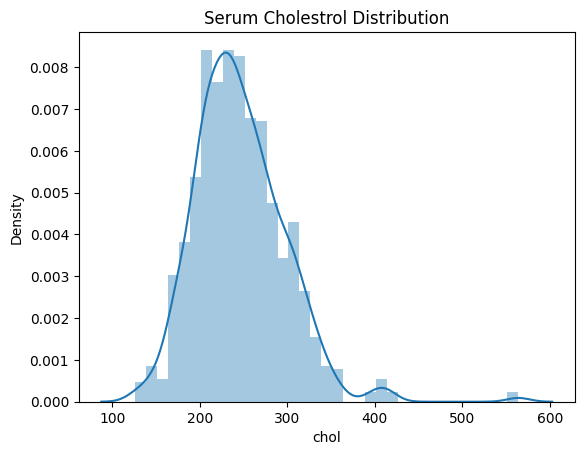

In [21]:
sns.distplot(heart_data['chol'])
plt.title('Serum Cholestrol Distribution')

Text(0.5, 1.0, 'max Heart Beat achived Distribution')

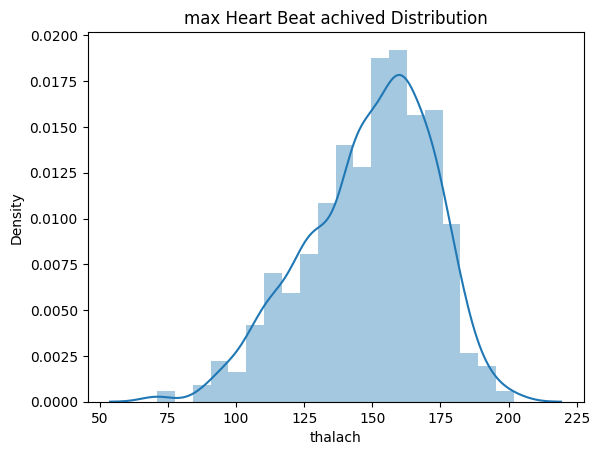

In [22]:
sns.distplot(heart_data['thalach'])
plt.title('max Heart Beat achived Distribution')

<Axes: xlabel='chol'>

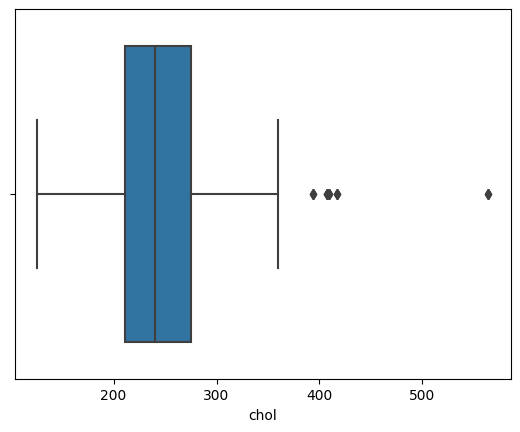

In [23]:
sns.boxplot(data=heart_data, x='chol')

# Univariate Analysis

Univariate Analysis of Numerical Features

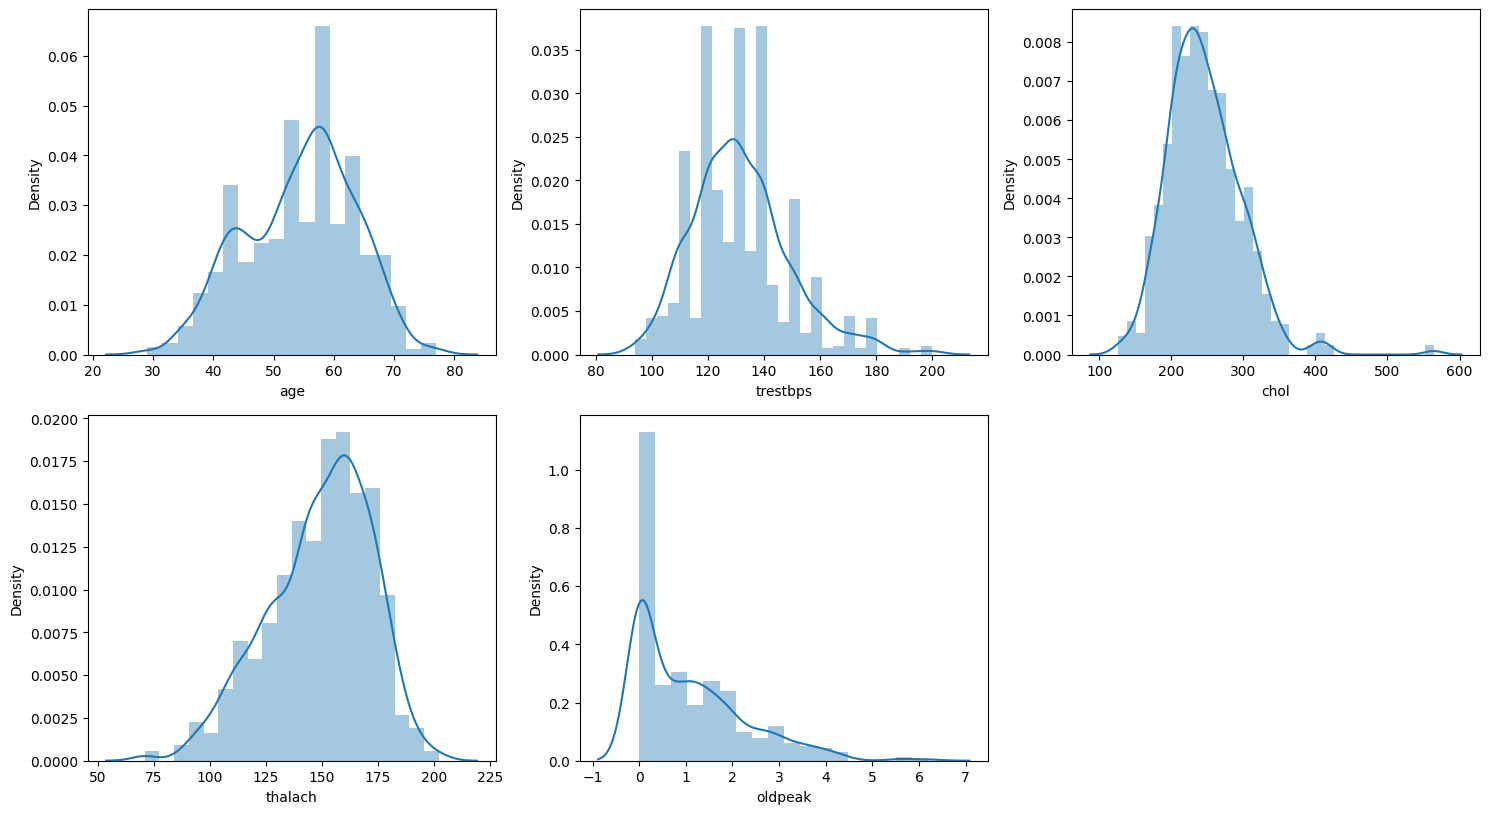

In [24]:
num_fea = ['age','trestbps','chol','thalach','oldpeak']
i = 0
plt.figure(figsize=(15,20))
for j in num_fea:
    plt.subplot(5,3,i+1)
    sns.distplot(heart_data[j])
    plt.xlabel(j)
    plt.tight_layout()
    i+=1

Univariate Analysis of Categorical Features

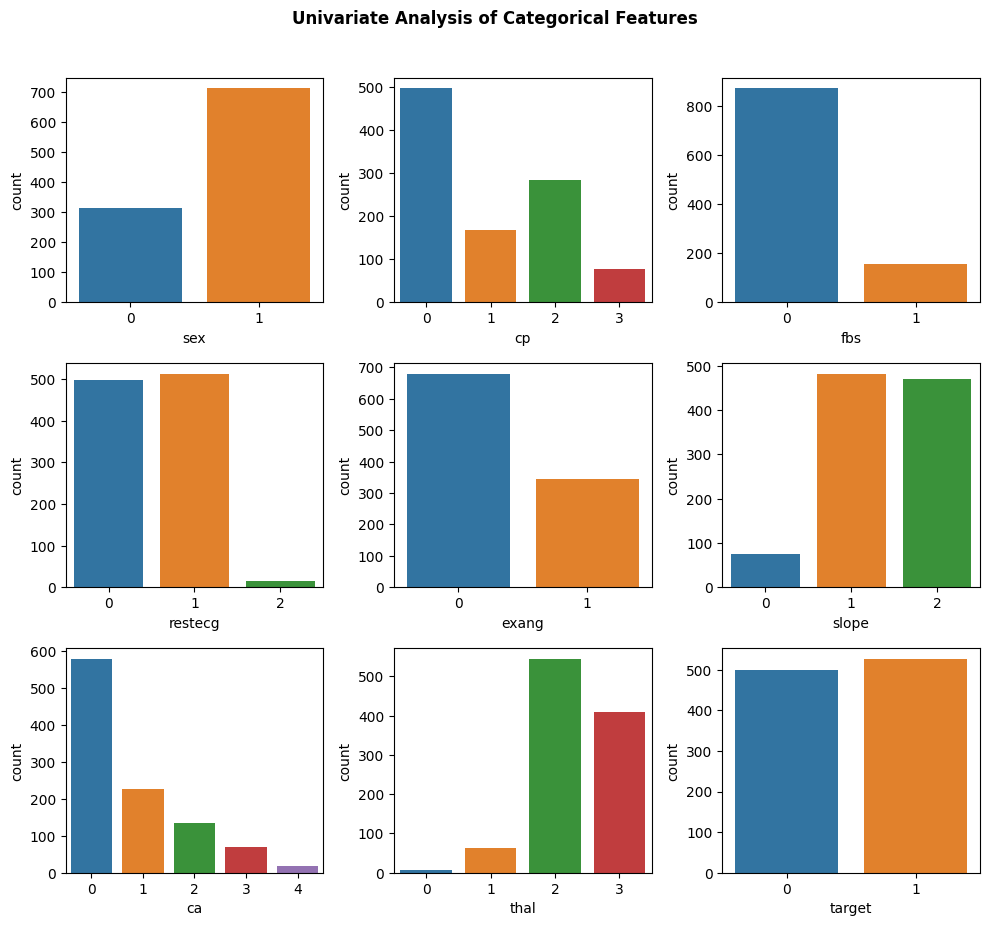

In [25]:
cat_fea = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
i = 0
plt.figure(figsize=(10,20))
for j in cat_fea:
    plt.subplot(7,3,i+1)
    plt.suptitle('Univariate Analysis of Categorical Features', fontweight = 'bold', alpha = 1, y =1.01)
    sns.countplot(data=heart_data, x=j)
    plt.xlabel(j)
    plt.tight_layout()
    i+=1

# Bivariate Analysis  

Bivariate Analysis of numerical features

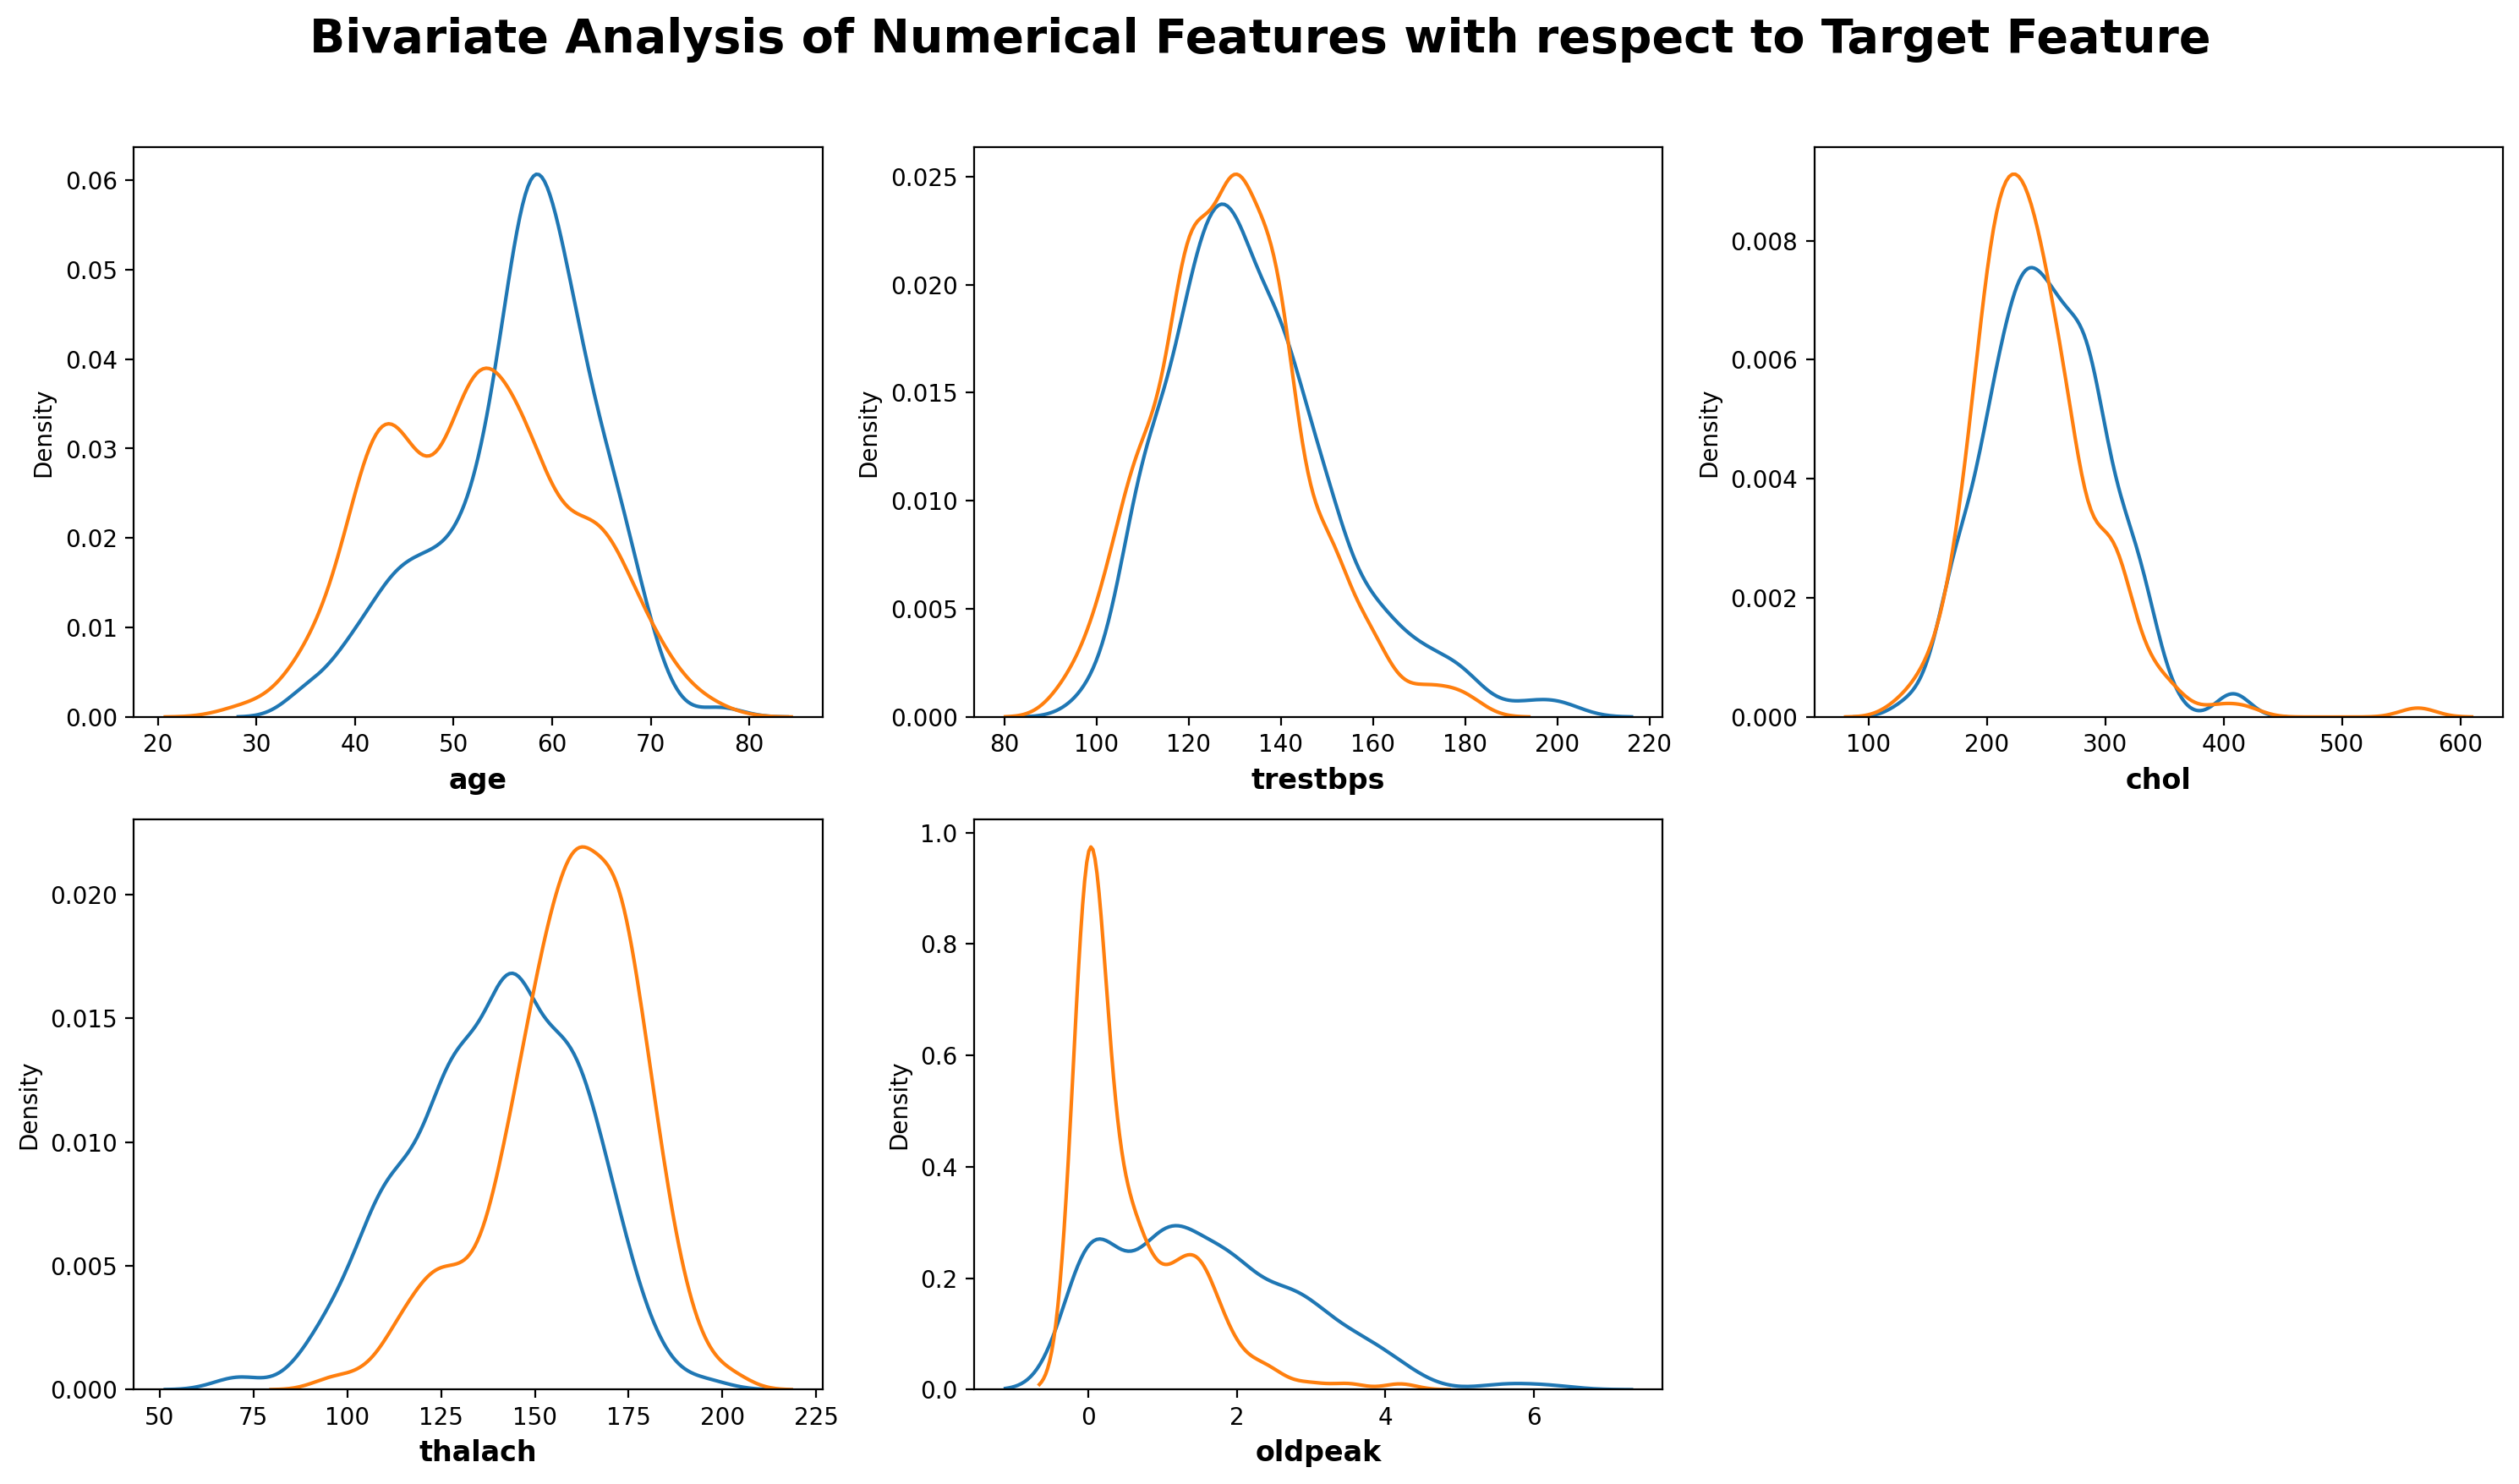

In [26]:
num_fe = ['age','trestbps','chol','thalach','oldpeak']
plt.figure(figsize=(15,20),dpi=200)
plt.suptitle('Bivariate Analysis of Numerical Features with respect to Target Feature',fontsize= 20, fontweight = 'bold', alpha = 1, y = 1.01)
i=0
for j in num_fe:
    plt.subplot(5,3,i+1)
    sns.distplot(heart_data[heart_data['target']==0][j], hist=False)
    sns.distplot(heart_data[heart_data['target']==1][j], hist=False)
    plt.xlabel(j, fontdict={'fontsize' : 12, 'fontweight':'bold'})
    plt.tight_layout()
    i+=1
    

Bivariate Analysis of Categorical features

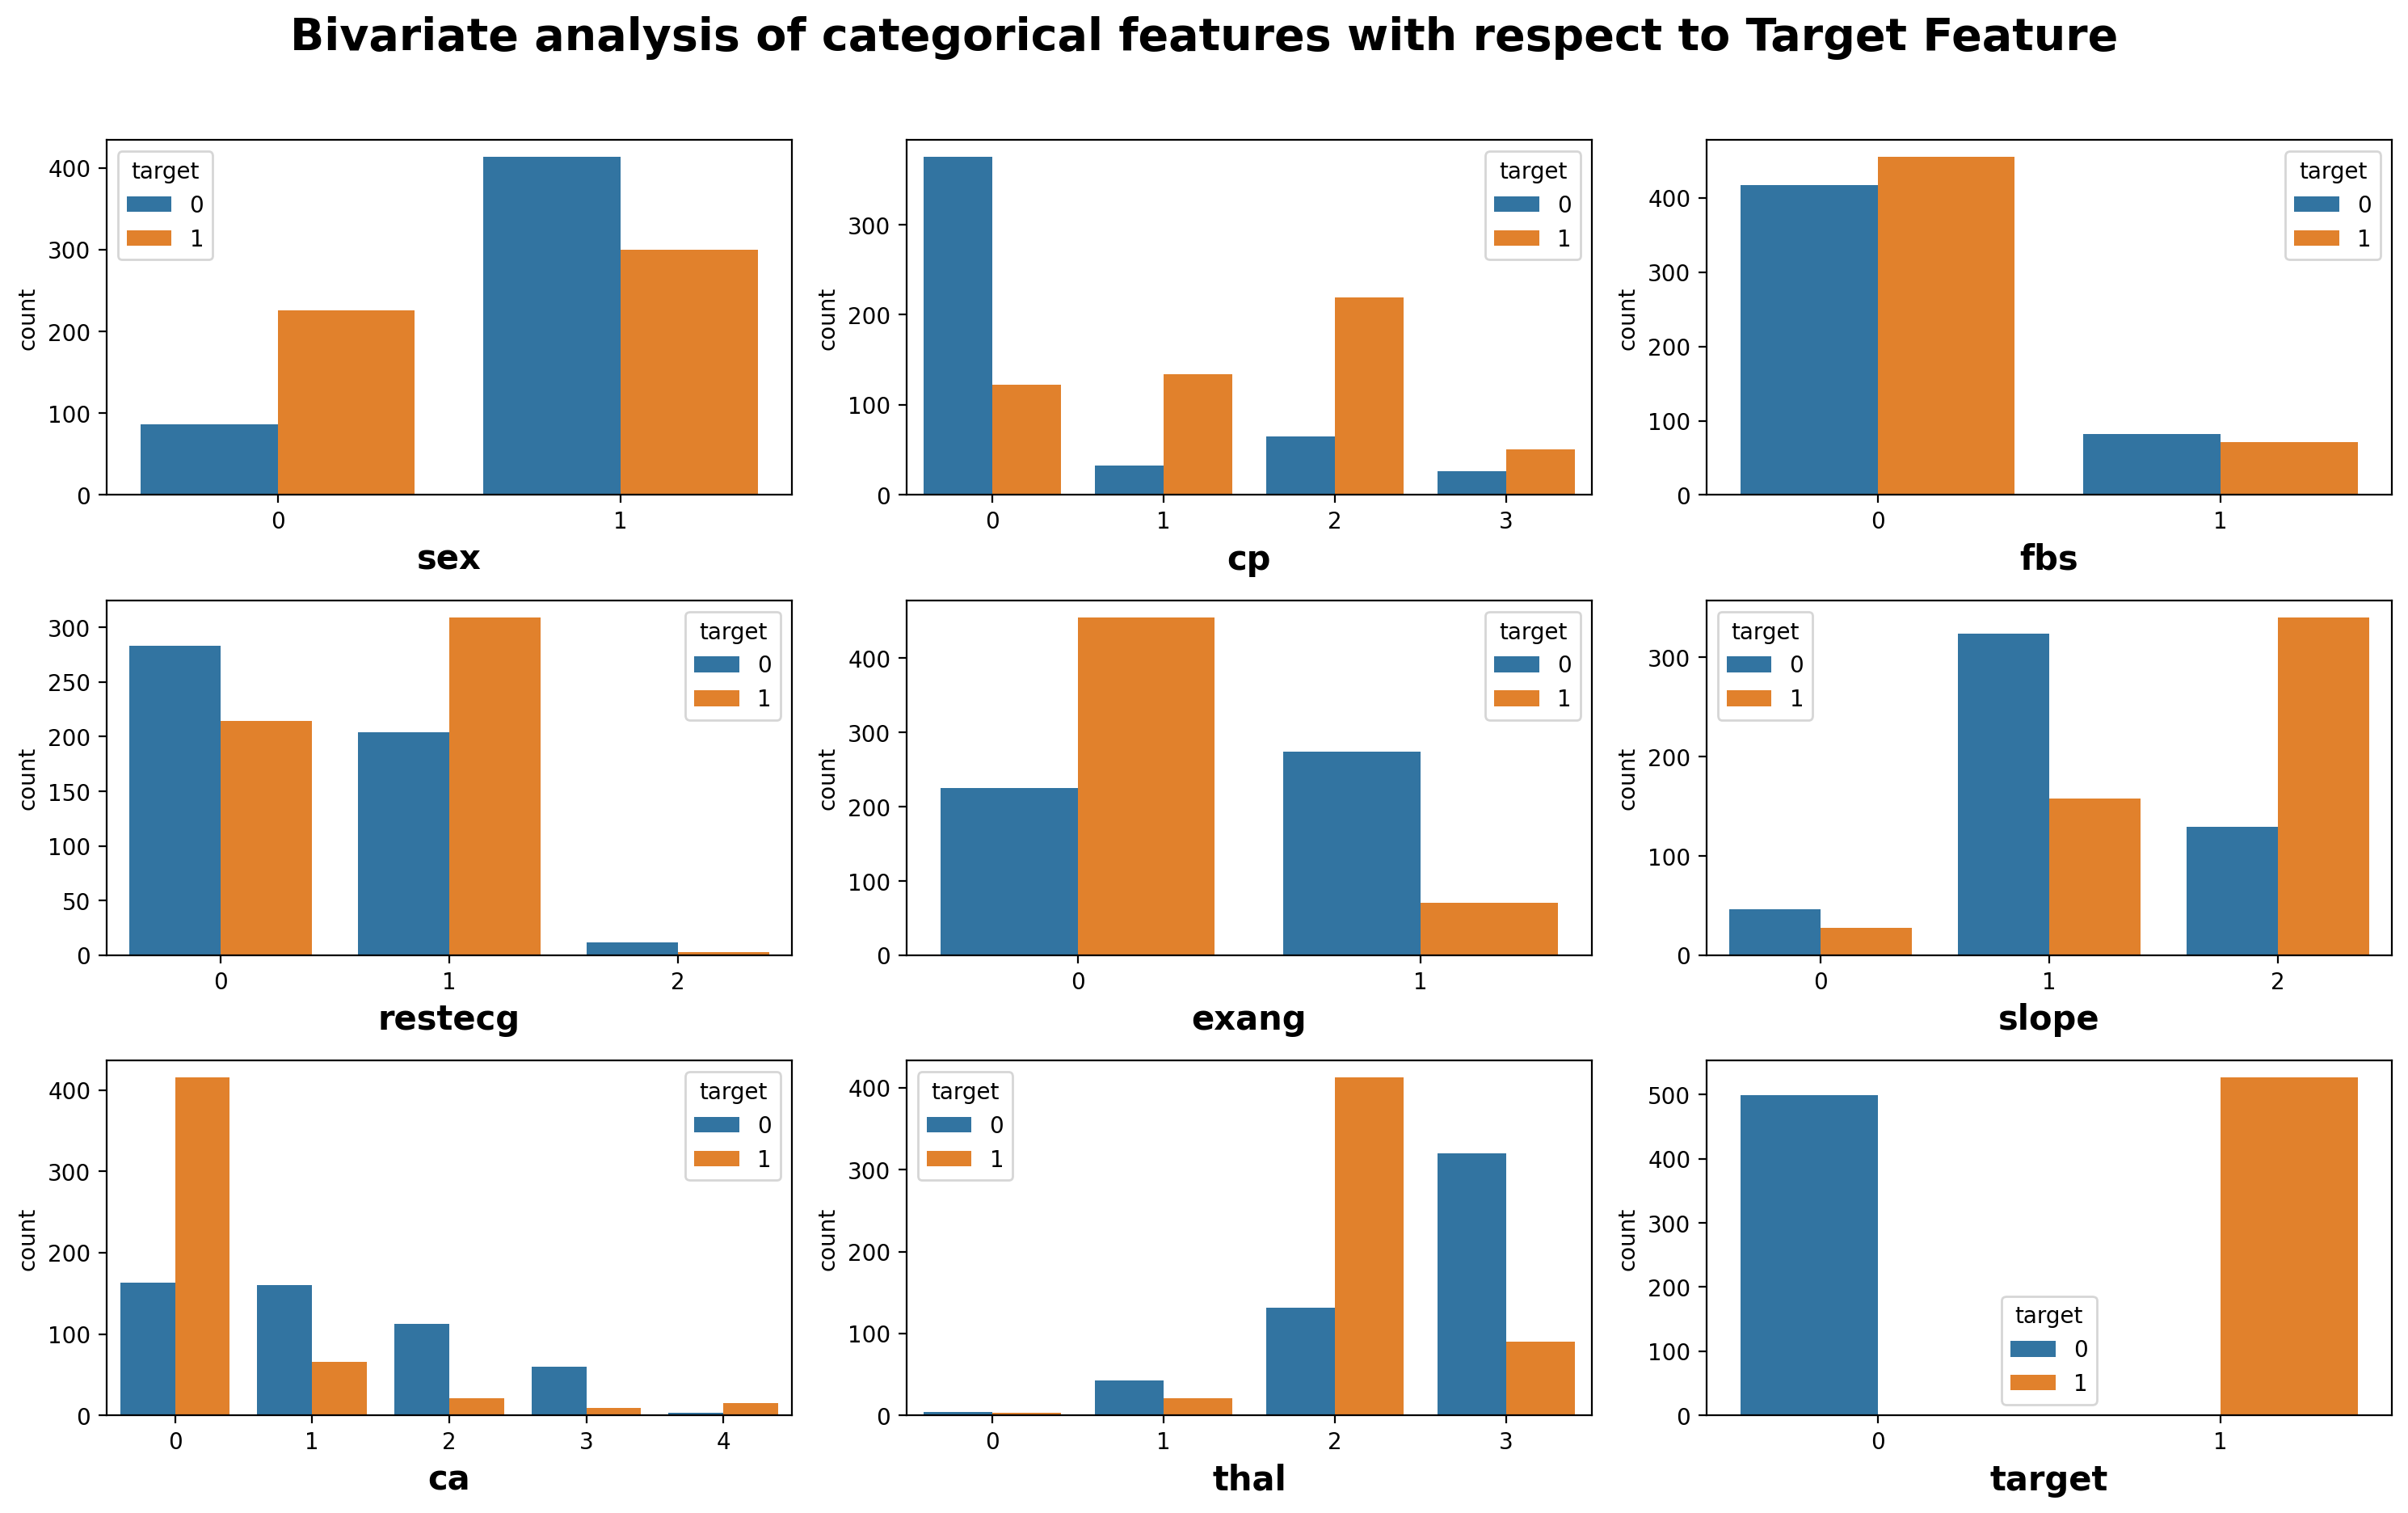

In [27]:
cat_fe = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
plt.figure(figsize=(15,20),dpi=200)
plt.suptitle('Bivariate analysis of categorical features with respect to Target Feature', fontsize = 20, fontweight = 'bold', alpha =1, y = 1.01)
i =0
for j in cat_fe:
    plt.subplot(7,3,i+1)
    sns.countplot(data=heart_data, x = j, hue='target')
    plt.xlabel(j, fontdict={'fontsize': 15, 'fontweight' : 'bold'})
    plt.tight_layout()
    i+=1

# Outliers

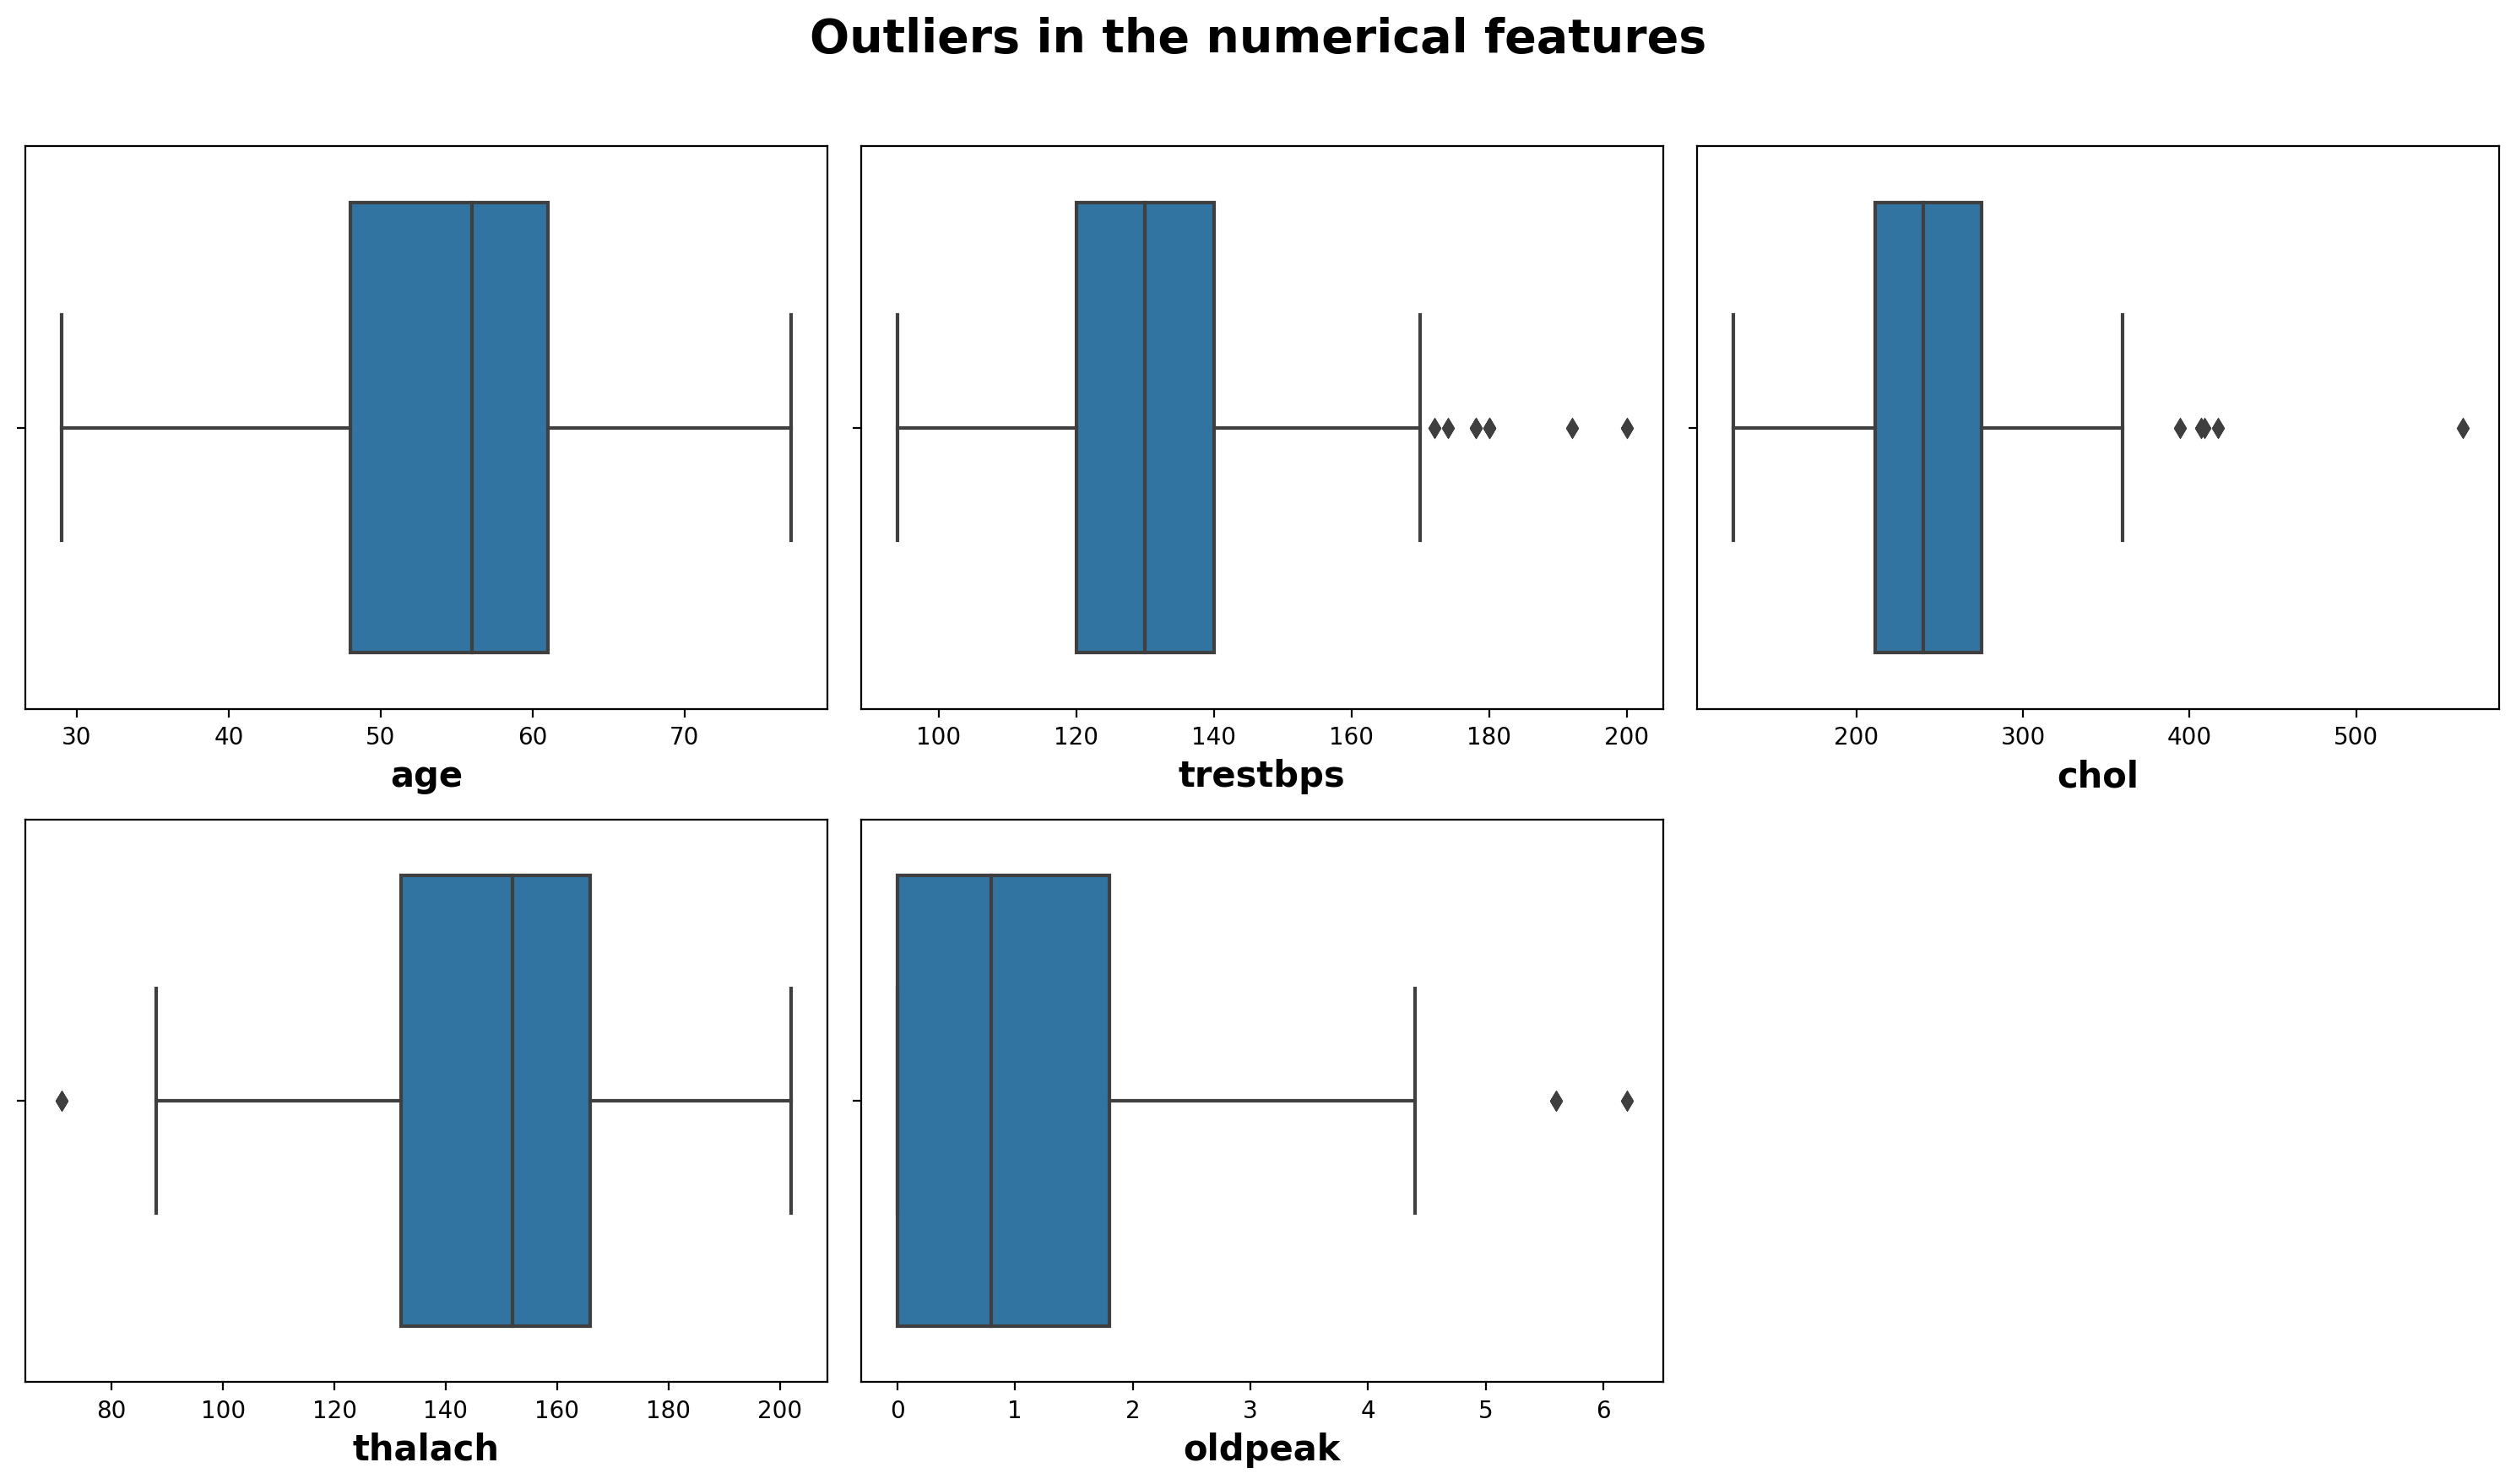

In [28]:
num_fea = ['age','trestbps','chol','thalach','oldpeak']
plt.figure(figsize=(15,20), dpi=200)
plt.suptitle('Outliers in the numerical features', fontsize = 20, fontweight = 'bold', alpha = 1, y= 1.01)
i=0
for j in num_fea:
    plt.subplot(5,3,i+1)
    sns.boxplot(data=heart_data, x=j)
    plt.xlabel(j, fontdict={'fontsize':15, 'fontweight': 'bold'})
    plt.tight_layout()
    i+=1

# RandomForest Classifier 

In [30]:
x = heart_data.drop('target',axis=1)
y = heart_data['target']

In [34]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
print(x_train.shape)
print(x_test.shape)

(820, 13)
(205, 13)


In [41]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [43]:
rf_model=RandomForestClassifier().fit(x_train,y_train)

In [44]:
train_predict_rf=rf_model.predict(x_train)
test_predict_rf=rf_model.predict(x_test)

In [46]:
acc_train_rf=accuracy_score(y_train,train_predict_rf)
acc_test_rf=accuracy_score(y_test,test_predict_rf)

In [47]:
acc_train_rf,acc_test_rf

(1.0, 0.9853658536585366)

In [49]:
print(classification_report(y_test, test_predict_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# GRADIENT BOOSTING CLASSIFIER

In [50]:
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9317073170731708

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       102
           1       0.92      0.95      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



# SUPPORT VECTOR MACHINE

In [52]:
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
accuracy_score(y_test, y_pred_svc)

0.6829268292682927

In [53]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66      0.76      0.71       103

    accuracy                           0.68       205
   macro avg       0.69      0.68      0.68       205
weighted avg       0.69      0.68      0.68       205



#  LOGISTIC REGRESSION

In [56]:
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
accuracy_score(y_test, y_pred_lr)

0.7853658536585366

In [57]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



# CONCLUSION

In conclusion, the integration of Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier, and Support Vector Machine in our heart disease analysis project has provided valuable insights and a robust foundation for predictive modeling in cardiovascular health. As we move forward, the continuous refinement and application of these models hold immense potential for enhancing early detection and prevention strategies, ultimately contributing to better patient outcomes and public health.